In [2]:
import pandas as pd
import matplotlib.pyplot as plt

player_stats_df = pd.read_csv(r'C:\Users\G. Torbar\Python\football_python\2022-2023 Football Player Stats.csv', encoding='latin-1', sep=';')

# Set display options to show all columns
pd.set_option('display.max_columns', None)

In [5]:
def top_in_column(df, column_x: str, column_y: str, column_top: str, column_player: str, top_number: int):
    top_column_index_list = list(df[column_top].nlargest(top_number).index)
    top_column_value_list = list(df.loc[top_column_index_list, column_player])
    x_top_column_list = list(df.loc[top_column_index_list, column_x])
    y_top_column_list = list(df.loc[top_column_index_list, column_y])
    
    #return top_recov_index_list, top_recov_value_list, x_top_recov_list, y_top_recov_list
    for x_coordinate, y_coordinate, top_column_value in zip(x_top_column_list, y_top_column_list, top_column_value_list):
        plt.text(x_coordinate + 0.1, y_coordinate, top_column_value, fontsize=8, ha='left', va='bottom', color='blue')
    
    return plt.scatter(x_top_column_list, y_top_column_list, c='blue')

In [63]:
def player_highlight(df, column_x: str, column_y: str, column_player: str, player_name: str, color: str):
    if not any(df[column_player] == player_name):
        print(f'Player {player_name} is not in dataset or you mispelled the name.')
        return
    player_index = df[column_player][df[column_player] == player_name].index
    x_player = df.loc[player_index, column_x]
    y_player = df.loc[player_index, column_y]
    
    plt.text(x_player + 0.1, y_player, player_name, fontsize=8, ha='left', va='bottom', color=color)
    return plt.scatter(x_player, y_player, c=color)

In [3]:
player_stats_df.head(10)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,17.7,1,1.53,0.28,18.5,0.04,0.20,19.0,0.11,0.0,0.0,23.20,31.0,74.9,293.0,85.7,13.30,16.20,81.9,5.93,7.74,76.6,0.90,2.37,38.1,0.11,1.75,1.75,0.45,0.11,3.22,31.0,28.10,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.20,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.00,0.06,0.00,0.06,1.64,0.51,0.45,0.90,0.28,0.51,1.47,34.6,0.96,1.69,0.11,1.58,0.06,1.69,0.28,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,31.8,1.75,47.0,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,2.54,0.51,0.00,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,22.0,0,0.86,0.05,5.3,0.00,0.00,13.5,0.00,0.0,0.0,38.50,47.2,81.5,751.5,318.5,10.90,12.90,84.5,23.20,25.70,90.1,3.77,7.00,53.9,0.05,0.27,2.91,0.09,0.00,4.50,47.2,43.30,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.50,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.00,0.05,0.00,0.00,2.50,1.59,1.45,1.00,0.05,1.32,1.68,78.4,0.36,2.23,0.77,1.45,2.00,4.50,2.91,0.05,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,46.7,0.36,53.3,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,0.18,1.59,0.00,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,8.6,0,1.05,0.35,33.3,0.00,0.00,19.2,0.00,0.0,0.0,40.00,49.5,80.8,676.0,188.1,18.50,22.00,84.1,15.50,18.70,82.6,4.42,5.93,74.5,0.00,1.51,3.95,1.74,0.35,6.40,49.5,48.10,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.00,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2.91,1.40,1.28,1.40,0.23,1.63,2.67,60.9,1.05,1.51,0.12,1.40,0.93,3.84,0.93,0.00,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,54.5,1.51,39.4,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.05,1.40,0.00,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,20.0,1,0.60,0.15,25.0,0.08,0.33,20.3,0.00,0.0,0.0,59.50,64.9,91.6,946.3,226.9,29.60,31.80,93.2,24.70,26.20,94.3,3.35,4.30,77.9,0.00,0.50,6.00,0.55,0.10,5.60,64.9,63.10,1.40,1.30,0.05,0.20,0.35,0.10,0.00,0.00,0.00,0.00,59.50,0.35,0.40,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.50,0.80,0.55,0.85,0.10,0.85,1.30,65.4,0.45,1.30,0.35,0.95,1.10,2.60,0.80,0.00,73.3,2.10,12.00,49.6,12.20,0.70,73.3,1.25,0.70,56.0,0.40,32.0,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,56.5,1.70,0.15,0.0,0.0,2.45,1.35,0.00,0.35,0.80,0.00,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,12.9,0,0.31,0.00,0.0,0.00,0.00,23.9,0.00,0.0,0.0,37.90,43.4,87.3,613.6,224.7,17.90,19.40,92.4,15.70,17.80,88.6,2.64,3.95,66.7,0.08,0.62,3.88,0.39,0.00,5.04,43.4,42.60,0.78,0.78,0.39,0.16,0.23,0.00,0.00,0.00,0.00,0.00,37.90,0.08,0.31,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.00,0.00,0.00,0.00,3.80,2.02,2.64,1.16,0.00,1.32,3.26,40.5,1.94,1.40,0.23,1.16,1.16,4.96,1.55,0.00,54.7,3.26,19.20,31.4,4.88,0.23,54.7,0.93,0.54,58.3,0.31,33.3,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,36.4,0.47,0.16,0.0,0.0,0.93,1.01,0.00,0.23,2.02,

In [58]:
defenders_columns = ['Player', 'Age', 'Nation', 'Squad', 'Pos', 'MP', 'Min', 'Goals', 'Shots', 'PasTotCmp', 'PasTotCmp%', 'PasProg', 'PasTotDist', 'PPA', 'PasAtt', 'Recov', 'Int', 'ToTkl', 'ToTkl%', 'Err', 'CarProg', 'AerWon', 'AerWon%']
top_defenders_df = player_stats_df[defenders_columns][(player_stats_df['Min']>700) & (player_stats_df['Pos']=='DF')].sort_values(['PasTotDist', 'PasProg'], ascending=False)
top_defenders_u23_df = player_stats_df[defenders_columns][(player_stats_df['Min']>1200) & (player_stats_df['Pos']=='DF') & (player_stats_df['Age']<23)].sort_values(['PasTotDist', 'PasProg'], ascending=False)
top_defenders_df.head(20)

,Player,Age,Nation,Squad,Pos,MP,Min,Goals,Shots,PasTotCmp,PasTotCmp%,PasProg,PasTotDist,PPA,PasAtt,Recov,Int,ToTkl,ToTkl%,Err,CarProg,AerWon,AerWon%
2496,Dayot Upamecano,24,FRA,Bayern Munich,DF,19,1700,0,0.26,78.8,89.8,6.72,1610.6,0.32,87.8,7.72,1.11,0.26,45.5,0.21,1.32,1.85,52.2
677,Rúben Dias,25,POR,Manchester City,DF,13,874,0,0.52,85.6,92.2,4.43,1544.5,0.00,92.8,4.23,1.24,0.00,0.0,0.00,0.52,2.68,66.7
2034,Sergio Ramos,36,ESP,Paris S-G,DF,20,1534,0,0.59,82.6,94.7,6.24,1542.3,0.29,87.2,6.53,1.18,0.29,41.7,0.12,0.53,1.53,55.3
1052,Joko Gvardiol,21,CRO,RB Leipzig,DF,18,1216,0,0.44,76.7,88.5,5.63,1516.4,0.37,86.6,6.67,1.41,0.07,11.1,0.07,1.11,1.56,56.8
496,Andreas Christensen,26,DEN,Barcelona,DF,10,723,0,0.38,83.0,94.5,5.13,1473.0,0.13,87.9,6.13,0.88,0.13,100.0,0.00,1.00,2.38,70.4
2581,Kyle Walker,32,ENG,Manchester City,DF,11,793,0,0.34,84.9,87.6,9.32,1456.0,0.23,96.9,5.45,0.57,0.11,20.0,0.00,2.50,1.36,80.0
750,Lewis Dunk,31,ENG,Brighton,DF,21,1889,0,0.48,73.5,89.9,3.71,1444.0,0.19,81.8,6.76,1.00,0.00,0.0,0.00,0.52,1.62,52.3
1433,Matthijs de Ligt,23,NED,Bayern Munich,DF,17,1217,1,0.67,73.0,91.8,5.04,1429.9,0.30,79.6,6.74,0.96,0.07,100.0,0.00,0.74,3.19,58.1
972,Joe Gomez,25,ENG,Liverpool,DF,17,1106,0,0.24,70.7,84.5,6.75,1422.6,0.16,83.7,8.37,1.54,0.08,20.0,0.16,0.81,3.01,57.8
2514,Virgil van Dijk,31,NED,Liverpool,DF,17,1485,2,1.09,71.5,89.1,4.36,1417.9,0.12,80.3,5.58,1.15,0.00,0.0,0.06,0.48,2.67,78.6


In [59]:
top_defenders_cro_df = player_stats_df[(player_stats_df['Nation']=='CRO') & (player_stats_df['Pos']=='DF')]
top_defenders_cro_df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
338,339,Domagoj Bradari?,CRO,DF,Salernitana,Serie A,23,1999,16,10,995,11.1,0,0.36,0.00,0.0,0.0,0.0,24.8,0.09,0.0,0.0,33.5,44.7,75.0,542.2,164.9,17.10,19.8,86.4,13.4,16.7,80.5,2.16,5.77,37.5,0.09,0.63,1.35,0.90,0.54,1.89,44.7,35.0,9.55,1.80,0.0,0.45,3.42,7.48,0.27,0.09,0.09,0.0,33.5,0.18,1.26,1.80,1.35,0.09,0.09,0.18,0.09,0.00,0.09,0.09,0.0,0.0,0.0,0.0,0.0,0.90,0.63,0.27,0.54,0.09,0.36,0.63,57.1,0.27,0.90,0.18,0.72,0.54,1.44,1.62,0.00,53.2,2.07,13.5,23.4,17.00,0.90,53.2,2.43,0.54,22.2,1.53,63.0,27.8,179.9,98.7,2.52,1.98,0.36,1.26,0.54,30.4,5.50,0.36,0.00,0.00,0.99,0.72,0.18,3.42,0.63,0.0,0.00,0.00,5.14,0.36,0.81,30.8
397,398,Duje ?aleta-Car,CRO,DF,Southampton,Premier League,26,1996,10,7,716,8.0,0,0.38,0.13,33.3,0.0,0.0,10.6,0.00,0.0,0.0,43.9,51.8,84.8,869.6,323.8,13.60,15.3,89.3,24.6,26.5,92.9,5.13,8.63,59.4,0.00,0.13,2.50,0.00,0.00,2.88,51.8,49.1,2.25,1.63,0.0,0.00,0.13,0.13,0.00,0.00,0.00,0.0,43.9,0.38,0.13,0.50,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.38,0.88,0.88,0.38,0.13,0.63,0.75,83.3,0.13,1.25,1.00,0.25,1.63,3.00,5.25,0.13,62.5,11.60,37.6,23.6,1.50,0.88,62.5,0.00,0.00,0.0,0.00,0.0,34.1,172.0,86.6,0.25,0.13,0.00,0.13,0.00,38.9,0.00,0.13,0.00,0.00,0.88,0.13,0.00,0.13,0.88,0.0,0.00,0.00,5.13,1.25,1.38,47.6
398,399,Duje ?aleta-Car,CRO,DF,Marseille,Ligue 1,26,1996,1,0,8,0.1,0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,20.0,20.0,100.0,460.0,160.0,0.00,0.0,0.0,20.0,20.0,100.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,20.0,20.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,20.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,30.0,10.00,20.0,10.0,0.00,0.00,30.0,0.00,0.00,0.0,0.00,0.0,20.0,50.0,30.0,0.00,0.00,0.00,0.00,0.00,20.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,10.00,0.00,100.0
794,795,Martin Erlic,CRO,DF,Sassuolo,Serie A,25,1998,14,14,1221,13.6,0,0.07,0.00,0.0,0.0,0.0,7.7,0.00,0.0,0.0,41.0,47.1,87.2,889.7,284.8,11.00,11.9,92.0,22.4,24.1,92.7,7.43,10.30,72.1,0.00,0.00,1.84,0.00,0.00,2.28,47.1,44.9,2.06,1.91,0.0,0.81,0.00,0.15,0.00,0.00,0.00,0.0,41.0,0.07,0.37,0.51,0.37,0.00,0.00,0.07,0.00,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.96,0.59,0.59,0.29,0.07,0.44,0.96,46.2,0.51,1.69,0.96,0.74,1.25,2.21,4.34,0.00,57.1,7.06,31.8,25.1,0.37,0.07,57.1,0.07,0.00,0.0,0.07,100.0,33.3,152.7,75.4,0.22,0.07,0.07,0.44,0.07,35.6,0.00,0.15,0.00,0.00,0.88,0.59,0.00,0.00,0.59,0.0,0.00,0.00,4.63,1.40,1.32,51.4
1052,1053,Joko Gvardiol,CRO,DF,RB Leipzig,Bundesliga,21,2002,18,13,1216,13.5,0,0.44,0.15,33.3,0.0,0.0,14.8,0.00,0.0,0.0,76.7,86.6,88.5,1516.4,560.7,24.40,26.1,93.5,43.1,45.8,94.2,8.67,13.10,66.1,0.00,0.44,4.81,0.37,0.00,5.63,86.6,84.0,2.44,2.30,0.0,0.81,0.07,0.15,0.00,0.00,0.00,0.0,76.7,0.15,0.67,1.19,1.11,0.00,0.00,0.07,0.00,0.00,0.15,0.15,0.0,0.0,0.0,0.0,0.0,0.81,0.52,0.52,0.30,0.00,0.37,0.81,45.5,0.44,1.33,0.59,0.74,1.41,2.22,3.26,0.07,95.0,10.00,44.3,49.0,2.15,0.59,95.0,0.67,0.59,88.9,0.07,11.1,67.6,336.9,186.8,1.11,0.30,0.00,0.30,0.22,71.0,0.15,0.07,0.00,0.00,0.89,0.89,0.00,0.07,0.52,0.0,0.07,0.07,6.67,1.56,1.19,56.8
1234,1235

Player Josip Juranovi? is not in dataset or you mispelled the name.
Player Dejan Lovren is not in dataset or you mispelled the name.
Player Hrvoje Smol?i? is not in dataset or you mispelled the name.
Player Nikola Soldo is not in dataset or you mispelled the name.
Player Josip Stanii? is not in dataset or you mispelled the name.


C:\Users\G. Torbar\anaconda3\envs\Algebra\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 154 (\x9a) missing from current font.
  func(*args, **kwargs)
C:\Users\G. Torbar\anaconda3\envs\Algebra\Lib\site-packages\matplotlib\text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
C:\Users\G. Torbar\anaconda3\envs\Algebra\Lib\site-packages\matplotlib\text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
C:\Users\G. Torbar\anaconda3\envs\Algebra\Lib\site-packages\matplotlib\text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
C:\Users\G. Torbar\

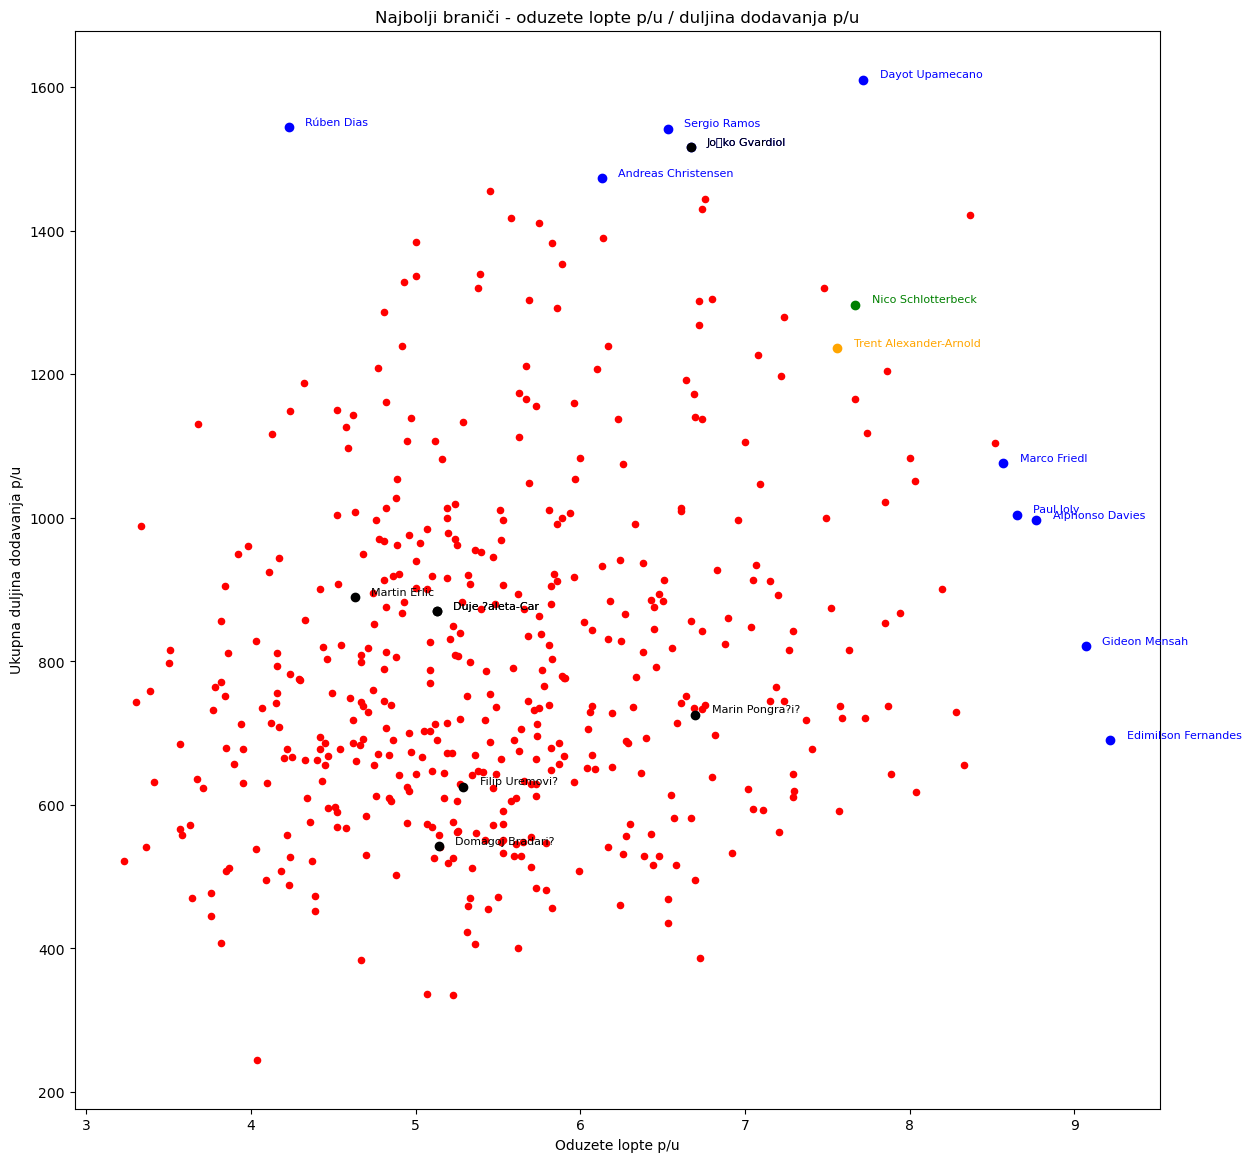

In [65]:
top_defenders_df.plot(
    x='Recov',
    y='PasTotDist',
    title='Najbolji braniči - oduzete lopte p/u / duljina dodavanja p/u',
    kind='scatter',
    figsize=(14, 14),
    color='red',
    xlabel='Oduzete lopte p/u',
    ylabel='Ukupna duljina dodavanja p/u'
)
top_in_column(top_defenders_df, 'Recov', 'PasTotDist', 'Recov', 'Player', 5)
top_in_column(top_defenders_df, 'Recov', 'PasTotDist', 'PasTotDist', 'Player', 5)
player_highlight(df=top_defenders_df, column_x='Recov', column_y='PasTotDist', column_player='Player', player_name='Nico Schlotterbeck', color='green')
player_highlight(df=top_defenders_df, column_x='Recov', column_y='PasTotDist', column_player='Player', player_name='Trent Alexander-Arnold', color='orange')
for player in list(top_defenders_cro_df['Player']):
    player_highlight(df=top_defenders_df, column_x='Recov', column_y='PasTotDist', column_player='Player', player_name=player, color='black')

Player Josip Juranovi? is not in dataset or you mispelled the name.
Player Dejan Lovren is not in dataset or you mispelled the name.
Player Hrvoje Smol?i? is not in dataset or you mispelled the name.
Player Nikola Soldo is not in dataset or you mispelled the name.
Player Josip Stanii? is not in dataset or you mispelled the name.


C:\Users\G. Torbar\anaconda3\envs\Algebra\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 154 (\x9a) missing from current font.
  func(*args, **kwargs)
C:\Users\G. Torbar\anaconda3\envs\Algebra\Lib\site-packages\matplotlib\text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
C:\Users\G. Torbar\anaconda3\envs\Algebra\Lib\site-packages\matplotlib\text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
C:\Users\G. Torbar\anaconda3\envs\Algebra\Lib\site-packages\matplotlib\text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
C:\Users\G. Torbar\

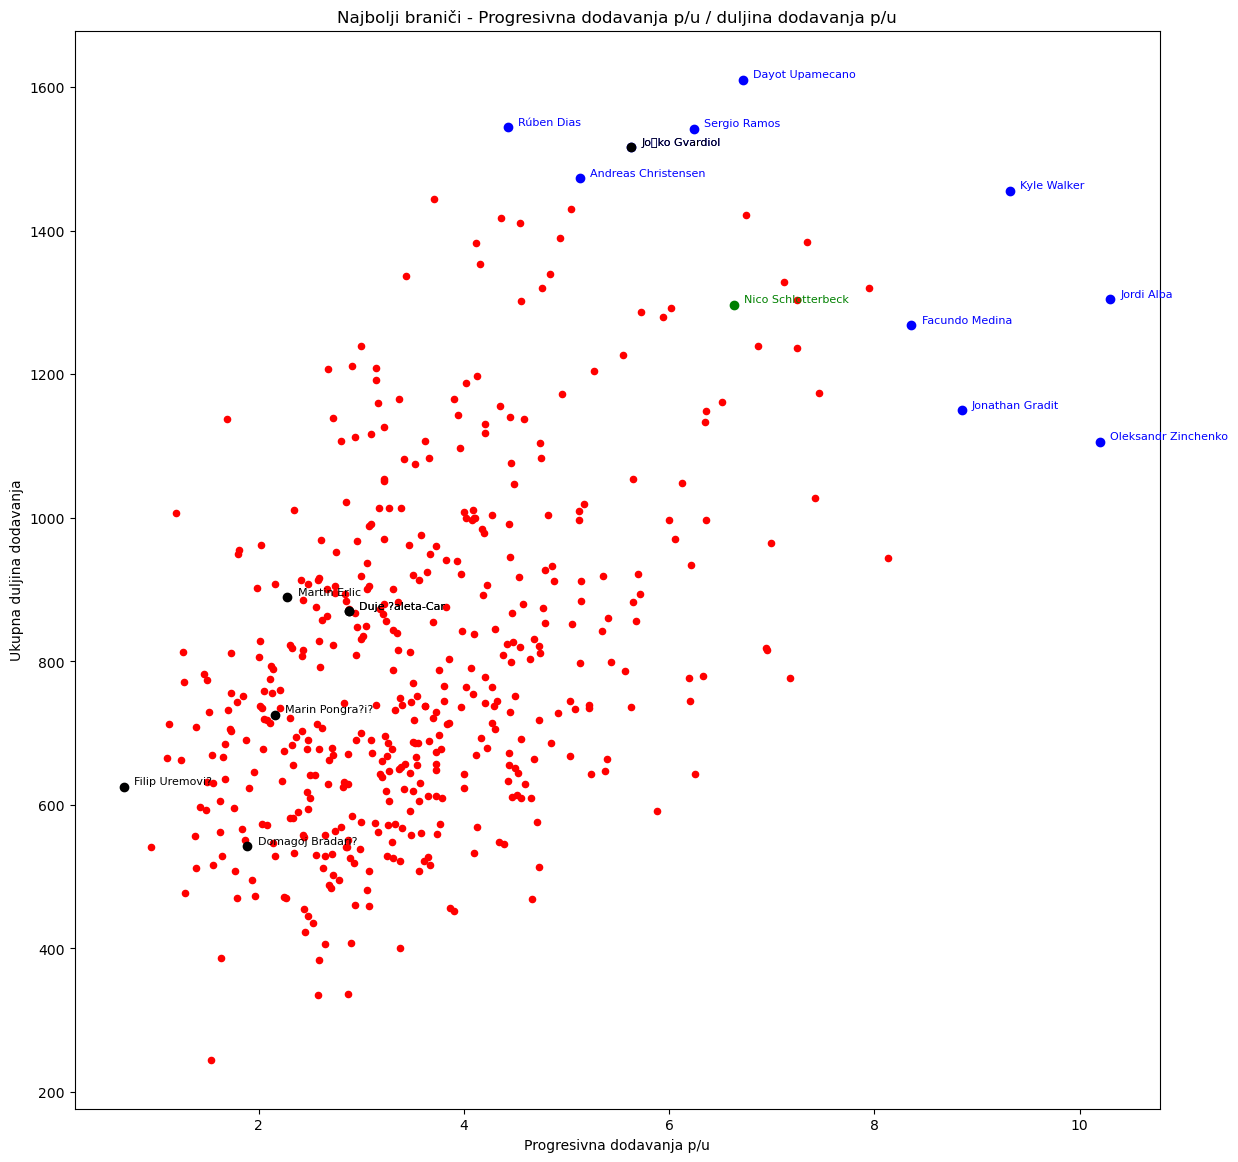

In [66]:
top_defenders_df.plot(
    x='PasProg',
    y='PasTotDist',
    title='Najbolji braniči - Progresivna dodavanja p/u / duljina dodavanja p/u',
    kind='scatter',
    figsize=(14, 14),
    color='red',
    xlabel='Progresivna dodavanja p/u',
    ylabel='Ukupna duljina dodavanja'
)
top_in_column(df=top_defenders_df, column_x='PasProg', column_y='PasTotDist', column_top='PasProg', column_player='Player', top_number=5)
top_in_column(df=top_defenders_df, column_x='PasProg', column_y='PasTotDist', column_top='PasTotDist', column_player='Player', top_number=5)
player_highlight(df=top_defenders_df, column_x='PasProg', column_y='PasTotDist', column_player='Player', player_name='Nico Schlotterbeck', color='green')
for player in list(top_defenders_cro_df['Player']):
    player_highlight(df=top_defenders_df, column_x='PasProg', column_y='PasTotDist', column_player='Player', player_name=player, color='black')

In [37]:
top_midfielders_cro_df = player_stats_df[(player_stats_df['Nation']=='CRO') & (player_stats_df['Pos']=='MF')]
top_midfielders_cro_df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
209,210,Toma Bai?,CRO,MF,Lazio,Serie A,26,1996,14,4,373,4.1,0,1.46,0.73,50.0,0.00,0.0,22.1,0.00,0.00,0.00,37.8,52.0,72.8,543.7,104.9,18.00,22.0,82.2,16.10,18.50,86.8,0.98,5.37,18.2,0.00,1.22,2.20,0.98,0.49,2.93,52.0,47.8,4.15,1.22,0.49,0.00,4.15,0.00,1.22,0.49,0.73,0.0,37.8,0.00,2.44,1.71,0.98,0.00,0.00,0.00,0.73,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,1.22,0.73,0.73,0.24,0.24,0.49,1.22,40.0,0.73,1.71,0.00,1.71,1.22,2.44,1.46,0.00,63.9,1.95,13.20,32.4,18.80,1.95,63.9,0.98,0.00,0.0,0.73,75.0,38.8,186.6,85.4,2.68,1.22,0.24,2.20,1.22,43.4,3.66,0.24,0.0,0.0,1.95,2.20,0.00,4.15,0.73,0.0,0.0,0.0,4.88,1.95,1.46,57.1
290,291,Kristijan Bistrovi?,CRO,MF,Lecce,Serie A,24,1998,11,5,461,5.1,0,1.57,0.20,12.5,0.00,0.0,24.4,0.78,0.00,0.00,19.8,27.5,72.1,366.1,133.7,8.82,10.2,86.5,6.86,9.41,72.9,3.14,4.90,64.0,0.00,1.18,1.96,0.39,0.20,3.14,27.5,23.3,4.12,2.16,0.00,0.59,4.12,0.00,1.37,0.59,0.59,0.0,19.8,0.00,1.18,1.96,0.59,1.37,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.59,0.20,0.59,0.00,0.00,0.00,0.78,0.0,0.78,0.59,0.00,0.59,0.00,0.59,0.78,0.00,33.1,0.98,5.69,16.7,10.80,0.59,33.1,0.20,0.00,0.0,0.20,100.0,16.3,74.1,23.3,0.78,0.20,0.00,0.59,0.98,19.4,1.57,0.00,0.0,0.0,0.39,0.78,0.20,4.12,0.20,0.0,0.0,0.0,2.94,0.39,0.98,28.6
355,356,Marcelo Brozovi?,CRO,MF,Inter,Serie A,30,1992,11,7,641,7.1,2,1.55,0.56,36.4,0.18,0.5,21.4,0.00,0.00,0.00,59.9,69.2,86.6,1063.2,277.0,25.80,28.5,90.6,27.50,30.60,89.9,5.21,7.61,68.5,0.00,0.56,4.08,0.42,0.00,4.37,69.2,65.2,3.80,2.96,0.14,0.28,0.99,0.00,0.85,0.14,0.28,0.0,59.9,0.14,0.56,1.97,1.13,0.28,0.00,0.56,0.00,0.0,0.14,0.14,0.00,0.0,0.0,0.00,0.0,1.41,0.70,0.42,0.99,0.00,0.28,1.13,25.0,0.85,1.41,0.42,0.99,1.69,3.10,1.41,0.00,79.6,3.94,20.80,48.5,11.00,0.70,79.6,1.27,0.85,66.7,0.42,33.3,49.9,263.1,113.2,1.41,1.27,0.28,1.13,0.14,57.0,1.27,0.70,0.0,0.0,1.27,0.28,0.00,0.99,0.70,0.0,0.0,0.0,6.20,0.14,0.56,20.0
884,885,Bartol Franji?,CRO,MF,Wolfsburg,Bundesliga,23,2000,5,3,227,2.5,0,0.80,0.80,100.0,0.00,0.0,11.6,0.00,0.00,0.00,24.4,31.6,77.2,371.6,103.2,13.20,14.4,91.7,8.40,10.80,77.8,1.60,2.80,57.1,0.40,0.80,2.40,0.40,0.00,1.60,31.6,31.6,0.00,0.00,0.00,0.00,0.40,0.00,0.00,0.00,0.00,0.0,24.4,0.00,0.40,1.20,0.80,0.00,0.40,0.00,0.00,0.0,0.80,0.40,0.00,0.4,0.0,0.00,0.0,1.60,0.80,0.80,0.80,0.00,0.00,0.80,0.0,0.80,1.60,0.40,1.20,2.00,3.60,1.60,0.00,45.6,3.20,14.00,25.6,6.80,1.20,45.6,0.80,0.40,50.0,0.40,50.0,20.4,88.8,35.2,1.20,0.80,0.00,2.40,0.00,24.8,0.40,0.00,0.0,0.0,0.40,0.40,0.00,0.40,0.80,0.0,0.0,0.0,4.80,2.00,1.20,62.5
1327,1328,Mateo Kova?i?,CRO,MF,Chelsea,Premier League,28,1994,15,7,835,9.3,0,1.29,0.00,0.0,0.00,0.0,25.6,0.00,0.00,0.00,57.7,68.9,83.8,951.9,291.3,28.40,32.3,88.0,23.50,26.20,89.8,3.87,6.77,57.1,0.11,1.08,8.39,1.29,0.11,8.17,68.9,67.5,1.40,1.18,0.65,0.75,0.22,0.22,0.00,0.00,0.00,0.0,57.7,0.00,1.18,3.01,2.58,0.11,0.00,0.32,0.00,0.0,0.22,0.22,0.00,0.0,0.0,0.00,0.0,1.94,1.29,0.75,0.97,0.22,0.86,1.29,66.7,0.43,0.54,0.11,0.43,1.29,3.23,0.97,0.00,78.7,1.83,14.00,50.1,15.30,0.32,78.7,0.97,0.22,22.2,0.54,55.6,50.5,308.4,141.0,2.15,1.94,0.11,1.40,1.29,60.8,1.08,0.32,0.0,0.0,1.08,0.54,0.00,0.22,1.29,0.0,0.0,0.0,6.34,0.43,0.75,36.4
1685,1686,Luka

In [46]:
top_midfielders_df = player_stats_df[(player_stats_df['Min']>800) & (player_stats_df['Pos']=='MF')].sort_values(['PasTotDist', 'PasProg'], ascending=False)
top_midfielders_df.head(20)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
1337,1338,Toni Kroos,GER,MF,Real Madrid,La Liga,33,1990,17,14,1219,13.5,2,1.26,0.44,35.3,0.12,0.33,25.5,0.15,0.00,0.00,92.6,101.9,90.9,1747.1,626.8,38.8,39.9,97.4,39.0,41.1,95.0,12.50,17.30,72.5,0.15,2.15,15.40,1.19,0.44,12.70,101.9,91.3,9.93,5.26,0.15,2.15,5.78,0.59,4.07,1.41,1.56,0.07,92.6,0.59,0.37,4.67,2.96,1.48,0.00,0.07,0.07,0.07,0.22,0.15,0.07,0.00,0.00,0.00,0.00,2.07,1.33,0.59,1.48,0.00,1.04,2.30,45.2,1.26,1.26,0.15,1.11,1.04,3.11,0.37,0.00,108.3,2.22,20.7,66.2,22.1,0.67,108.3,0.81,0.15,18.2,0.44,54.5,71.6,318.8,174.7,2.07,1.33,0.15,0.37,0.52,84.3,1.41,0.15,0.07,0.07,1.11,1.48,0.00,5.78,1.33,0.00,0.00,0.00,6.67,0.37,0.30,55.6
2098,2099,Rodri,ESP,MF,Manchester City,Premier League,26,1996,20,20,1733,19.3,1,1.61,0.36,22.6,0.03,0.14,18.2,0.00,0.00,0.00,88.4,96.9,91.3,1639.3,400.9,34.9,37.8,92.2,41.5,44.2,93.8,10.50,12.30,85.3,0.21,1.14,9.22,1.09,0.05,8.76,96.9,95.0,1.81,1.55,0.05,0.93,0.16,0.10,0.00,0.00,0.00,0.00,88.4,0.05,0.47,3.42,3.16,0.00,0.00,0.16,0.05,0.05,0.47,0.47,0.00,0.00,0.00,0.00,0.00,2.28,1.45,1.04,0.93,0.31,0.98,1.66,59.4,0.67,1.45,0.52,0.93,1.14,3.42,1.14,0.05,106.4,3.63,22.6,64.1,20.3,1.81,106.4,0.73,0.47,64.3,0.21,28.6,63.7,321.3,169.8,2.44,2.49,0.05,0.62,0.62,80.5,1.14,0.16,0.00,0.00,1.61,0.57,0.10,0.16,1.45,0.00,0.00,0.00,9.74,2.44,1.19,67.1
2536,2537,Marco Verratti,ITA,MF,Paris S-G,Ligue 1,30,1992,17,16,1244,13.8,0,0.22,0.14,66.7,0.00,0.00,17.3,0.00,0.00,0.00,97.2,104.2,93.3,1523.6,521.1,49.1,51.7,95.0,36.7,38.4,95.5,6.59,7.75,85.0,0.00,0.87,9.93,1.96,0.00,10.90,104.2,98.8,5.14,4.13,0.51,0.07,0.29,1.01,0.00,0.00,0.00,0.00,97.2,0.29,0.58,2.39,2.32,0.00,0.07,0.00,0.00,0.00,0.36,0.36,0.00,0.00,0.00,0.00,0.00,3.91,2.32,1.88,1.81,0.22,2.03,3.84,52.8,1.81,2.10,0.43,1.67,1.16,5.07,0.29,0.14,114.1,3.26,21.7,72.8,20.7,0.87,114.1,2.39,1.38,57.6,0.65,27.3,96.4,474.7,238.8,1.88,3.12,0.29,0.87,1.52,91.5,1.81,0.51,0.07,0.00,1.38,1.88,0.00,0.29,2.32,0.00,0.00,0.00,7.61,0.22,0.43,33.3
1293,1294,Joshua Kimmich,GER,MF,Bayern Munich,Bundesliga,28,1995,19,18,1599,17.8,3,1.18,0.51,42.9,0.14,0.33,25.6,0.17,0.00,0.00,75.3,89.3,84.3,1414.4,462.5,31.2,33.4,93.4,32.2,36.0,89.4,10.40,16.90,61.8,0.22,2.53,9.21,2.25,0.11,10.50,89.3,77.5,11.60,4.55,1.01,0.28,7.47,0.84,6.24,2.58,2.81,0.22,75.3,0.17,0.73,5.00,2.81,1.91,0.06,0.11,0.06,0.06,0.67,0.51,0.11,0.00,0.06,0.00,0.00,2.53,1.46,0.51,1.69,0.34,1.18,2.13,55.3,0.96,0.79,0.06,0.73,1.46,3.99,1.29,0.00,99.2,3.20,19.2,54.0,26.8,0.56,99.2,0.90,0.45,50.0,0.28,31.3,56.4,272.2,100.8,1.29,0.90,0.17,0.96,1.07,67.2,2.02,0.28,0.06,0.06,0.96,1.57,0.00,7.47,1.46,0.00,0.00,0.00,9.10,0.62,1.07,36.7
2442,2443,Corentin Tolisso,FRA,MF,Lyon,Ligue 1,28,1994,16,12,927,10.3,0,0.97,0.29,30.0,0.00,0.00,23.2,0.00,0.00,0.00,76.0,85.5,88.9,1398.7,414.9,31.0,33.9,91.4,31.9,35.0,91.1,10.20,12.20,83.3,0.00,1.55,10.80,1.75,0.39,10.80,85.5,82.8,2.72,2.14,0.49,1.17,1.36,0.29,0.10,0.00,0.00,0.00,76.0,0.00,0.78,3.88,3.40,0.29,0.00,0.00,0.19,0.00,0.39,0.39,0.00,0.00,0.00,0.00,0.00,1.65,1.26,0.58,0.78,0.29,0.97,2.62,37.0,1.65,0.87,0.10,0.78,1.17,2.82,0.68,0.00,94.4,1.75,14.8,59.8,20.4,0.78,94.4,1.26,0.49,38.5,0.58,46.2,78.3,393.8,148.2,1.65,2.14,0.00,1.17,

Player Toma Bai? is not in dataset or you mispelled the name.
Player Kristijan Bistrovi? is not in dataset or you mispelled the name.
Player Marcelo Brozovi? is not in dataset or you mispelled the name.
Player Bartol Franji? is not in dataset or you mispelled the name.
Player Nikola Moro is not in dataset or you mispelled the name.
Player Mislav Ori? is not in dataset or you mispelled the name.
Player Ante Palaversa is not in dataset or you mispelled the name.
Player Marco Paali? is not in dataset or you mispelled the name.


C:\Users\G. Torbar\anaconda3\envs\Algebra\Lib\site-packages\matplotlib\text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
C:\Users\G. Torbar\anaconda3\envs\Algebra\Lib\site-packages\matplotlib\text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
C:\Users\G. Torbar\anaconda3\envs\Algebra\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 138 (\x8a) missing from current font.
  func(*args, **kwargs)
C:\Users\G. Torbar\anaconda3\envs\Algebra\Lib\site-packages\matplotlib\text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
C:\Users\G. Torbar\

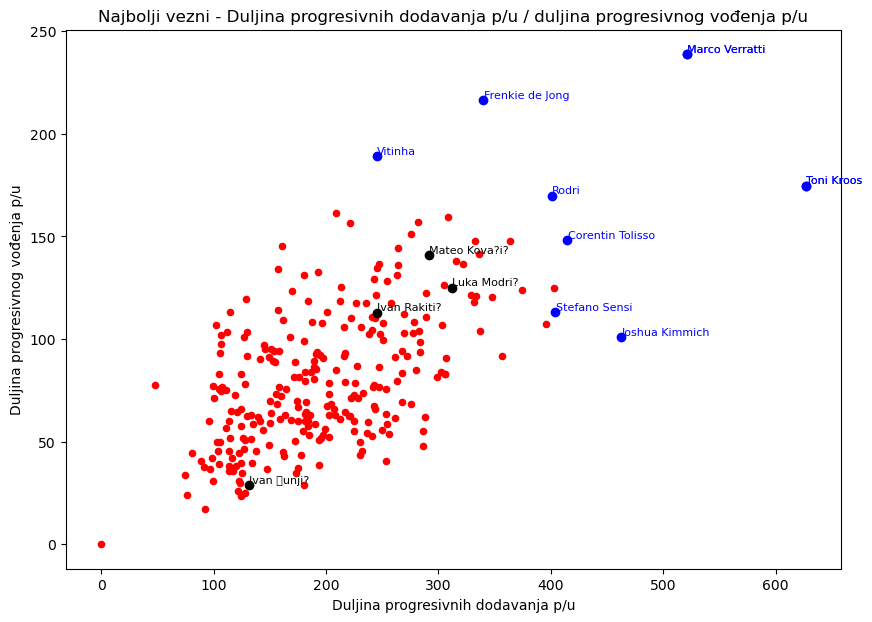

In [67]:
top_midfielders_df.plot(
    x='PasTotPrgDist',
    y='CarPrgDist',
    title='Najbolji vezni - Duljina progresivnih dodavanja p/u / duljina progresivnog vođenja p/u',
    kind='scatter',
    figsize=(10, 7),
    color='red',
    xlabel='Duljina progresivnih dodavanja p/u',
    ylabel='Duljina progresivnog vođenja p/u'
)
top_in_column(df=top_midfielders_df, column_x='PasTotPrgDist', column_y='CarPrgDist', column_top='CarPrgDist', column_player='Player', top_number=5)
top_in_column(df=top_midfielders_df, column_x='PasTotPrgDist', column_y='CarPrgDist', column_top='PasTotPrgDist', column_player='Player', top_number=5)
for player in list(top_midfielders_cro_df['Player']):
    player_highlight(df=top_midfielders_df, column_x='PasTotPrgDist', column_y='CarPrgDist', column_player='Player', player_name=player, color='black')

Player Toma Bai? is not in dataset or you mispelled the name.
Player Kristijan Bistrovi? is not in dataset or you mispelled the name.
Player Marcelo Brozovi? is not in dataset or you mispelled the name.
Player Bartol Franji? is not in dataset or you mispelled the name.
Player Nikola Moro is not in dataset or you mispelled the name.
Player Mislav Ori? is not in dataset or you mispelled the name.
Player Ante Palaversa is not in dataset or you mispelled the name.
Player Marco Paali? is not in dataset or you mispelled the name.


C:\Users\G. Torbar\anaconda3\envs\Algebra\Lib\site-packages\matplotlib\text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
C:\Users\G. Torbar\anaconda3\envs\Algebra\Lib\site-packages\matplotlib\text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
C:\Users\G. Torbar\anaconda3\envs\Algebra\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 138 (\x8a) missing from current font.
  func(*args, **kwargs)
C:\Users\G. Torbar\anaconda3\envs\Algebra\Lib\site-packages\matplotlib\text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
C:\Users\G. Torbar\

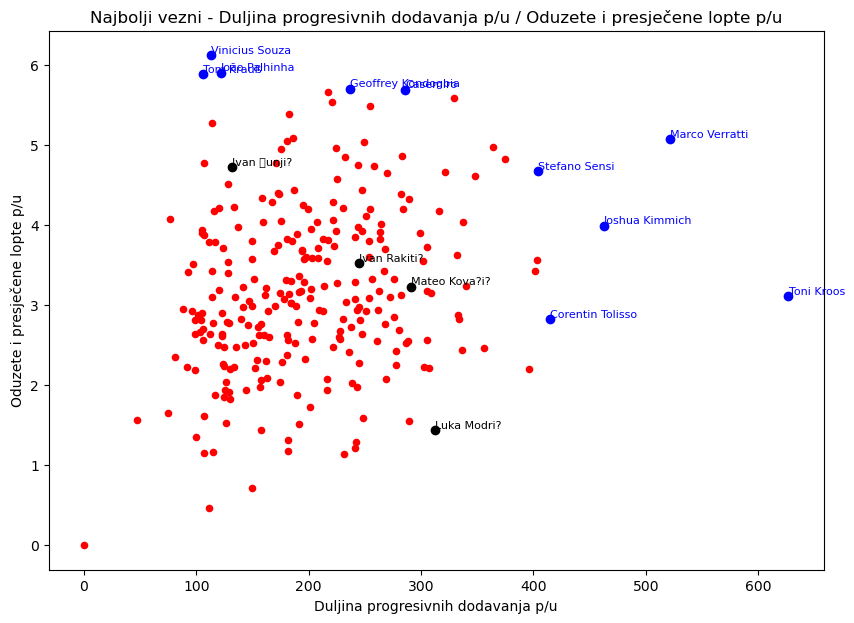

In [68]:
top_midfielders_df.plot(
    x='PasTotPrgDist',
    y='Tkl+Int',
    title='Najbolji vezni - Duljina progresivnih dodavanja p/u / Oduzete i presječene lopte p/u',
    kind='scatter',
    figsize=(10, 7),
    color='red',
    xlabel='Duljina progresivnih dodavanja p/u',
    ylabel='Oduzete i presječene lopte p/u'
)
top_in_column(df=top_midfielders_df, column_x='PasTotPrgDist', column_y='Tkl+Int', column_top='Tkl+Int', column_player='Player', top_number=5)
top_in_column(df=top_midfielders_df, column_x='PasTotPrgDist', column_y='Tkl+Int', column_top='PasTotPrgDist', column_player='Player', top_number=5)
for player in list(top_midfielders_cro_df['Player']):
    player_highlight(df=top_midfielders_df, column_x='PasTotPrgDist', column_y='Tkl+Int', column_player='Player', player_name=player, color='black')